In [1]:
import os
import sys
import pandas as pd
import numpy as np
import geopandas as gpd
import xarray as xr
from shapely.geometry import Point
import json
import matplotlib.pyplot as plt

import sesame as ssm

In [95]:
raw_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'raw/')
output_path = os.path.join(os.path.dirname(os.getcwd()),'data', 'output/')
plot_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'plot/')
netcdf_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'netcdf/')

# Pre-processing Iron Ore Data

In [4]:
# Material flow database
df = pd.read_csv(raw_path + "MFD_detailed_global_iron_flow.csv", encoding='ISO-8859-1')
df = df[df["Flow"] == "DE"]
df = df[df["TCCC_Name"]== "Iron ores concentrates and compounds"]
# List of countries to remove
# Czech Republic doesn't have any values. Values are included in Czechoslovakia. In order to avoid duplications in the names, we removed Czech Republic from then df
countries_to_remove = ['Czech Republic', 'Africa', 'Asia + Pacific', 'EECCA', 'Europe', 'Latin America + Caribbean', 'North America', 'West Asia', 'World']
# Remove the rows where the 'country' column matches any of the countries in the list
df = df[~df['Country'].isin(countries_to_remove)]

# List of columns to drop
columns_to_drop = ['AlphaNumISO', 'Flow', 'Flow_Exp', 'MFandRP_Reg', 'TCCC_Code', 'TCCC_Name', "Units"]
# Drop the specified columns
df = df.drop(columns=columns_to_drop)
# convert the remaining data to the appropriate types
df = df.apply(pd.to_numeric, errors='ignore')
# Reset the index if necessary
df = df.reset_index(drop=True)
df

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,540000.0,567000.0,594000.0,384000.0,400000.0,650000.0,480000.0,510000.0,510000.0,...,1.149858e+04,1.149858e+04,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000,0.000
2,Algeria,2863000.0,3147000.0,3669000.0,3135000.0,3820000.0,3188000.0,2789000.0,3183000.0,2750000.0,...,1.474279e+06,1.700000e+06,1700000.0,1066700.0,911135.0,944000.0,826000.0,9.644433e+05,1369768.168,1313535.275
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,6091000.0,6158000.0,4831000.0,6052000.0,5606000.0,5604000.0,5500000.0,5500000.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Viet Nam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.972100e+06,2.371300e+06,1506200.0,2495300.0,2719000.0,2691000.0,3056000.0,5.515000e+06,5588496.000,5785361.625
214,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,Yugoslavia SFR,3694000.0,3728000.0,3960000.0,4666000.0,5034000.0,5239000.0,4260000.0,4451000.0,4564000.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000,0.000
216,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = ssm.add_iso3_column(df, "Country")
df

Country Not Found: ['Ethiopia (Former)', 'Macedonia', 'Netherlands Antilles', 'North Yemen', 'South Yemen', 'Sudan (Former)']


,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,ISO3
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG
1,Albania,540000.0,567000.0,594000.0,384000.0,400000.0,650000.0,480000.0,510000.0,510000.0,...,1.149858e+04,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000,0.000,ALB
2,Algeria,2863000.0,3147000.0,3669000.0,3135000.0,3820000.0,3188000.0,2789000.0,3183000.0,2750000.0,...,1.700000e+06,1700000.0,1066700.0,911135.0,944000.0,826000.0,9.644433e+05,1369768.168,1313535.275,DZA
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AND
4,Angola,6091000.0,6158000.0,4831000.0,6052000.0,5606000.0,5604000.0,5500000.0,5500000.0,0.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000,0.000,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Viet Nam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.371300e+06,1506200.0,2495300.0,2719000.0,2691000.0,3056000.0,5.515000e+06,5588496.000,5785361.625,VNM
214,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YEM
215,Yugoslavia SFR,3694000.0,3728000.0,3960000.0,4666000.0,5034000.0,5239000.0,4260000.0,4451000.0,4564000.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000,0.000,YUG
216,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZMB


In [7]:
df[df["ISO3"].isna()].sum()

Country    Ethiopia (Former)MacedoniaNetherlands Antilles...
1970                                                     0.0
1971                                                     0.0
1972                                                     0.0
1973                                                     0.0
1974                                                     0.0
1975                                                     0.0
1976                                                     0.0
1977                                                     0.0
1978                                                     0.0
1979                                                     0.0
1980                                                     0.0
1981                                                     0.0
1982                                                     0.0
1983                                                     0.0
1984                                                     0.0
1985                    

Country Not Found: ['Ethiopia (Former)', 'Macedonia', 'Netherlands Antilles', 'North Yemen', 'Saint Vincent/Grenadines', 'South Yemen', 'Sudan (Former)']
The above countries does not have any iron ore extraction data. We can remove those countries from the list.


In [8]:
# Drop rows where 'ISO3' column has NaN values
df = df.dropna(subset=["ISO3"])

In [9]:
# Reshape the DataFrame
mfd_iron = df.melt(id_vars=['ISO3', "Country"], var_name='year', value_name='iron_mfd')
# Ensure 'year' is in datetime format
mfd_iron['year'] = pd.to_datetime(mfd_iron['year'], format='%Y')
# Extract only the year
mfd_iron['year'] = mfd_iron['year'].dt.year
mfd_iron["source_mdf"] = "UNEP"
mfd_iron

,ISO3,Country,year,iron_mfd,source_mdf
0,AFG,Afghanistan,1970,NaN,UNEP
1,ALB,Albania,1970,540000.000,UNEP
2,DZA,Algeria,1970,2863000.000,UNEP
3,AND,Andorra,1970,NaN,UNEP
4,AGO,Angola,1970,6091000.000,UNEP
...,...,...,...,...,...
10595,VNM,Viet Nam,2019,5785361.625,UNEP
10596,YEM,Yemen,2019,NaN,UNEP
10597,YUG,Yugoslavia SFR,2019,0.000,UNEP
10598,ZMB,Zambia,2019,NaN,UNEP


In [10]:
mfd_iron["iron_mfd"].sum()

np.float64(74886449851.93674)

Download BGS data from API

In [ ]:
import requests
# Base URL for the API
base_url = "https://ogcapi.bgs.ac.uk/collections/world-mineral-statistics/items"
iron_related_commodities = ['iron', 'pig iron', 'steel', 'iron ore', 'iron oxide']

# Initialize an empty list to store filtered data
filtered_data = []

# Initial URL for fetching data
url = base_url

# Fetch and filter data in pages
while url:
    response = requests.get(url)
    data = response.json()
    
    # Extract features from the current page
    features = [feature['properties'] for feature in data.get('features', [])]
    
    # Filter the current chunk for iron and steel-related commodities
    chunk_filtered_features = [
        f for f in features 
        if f.get('erml_commodity') and 
        any(commodity.lower() in f['erml_commodity'].lower() for commodity in iron_related_commodities)
    ]
    
    # If the current chunk has relevant data, store it in the list
    if chunk_filtered_features:
        filtered_data.extend(chunk_filtered_features)
        print(f"Filtered and added {len(chunk_filtered_features)} rows from the current chunk.")
    
    # Check for the 'next' link in the API response for pagination
    next_link = None
    for link in data.get('links', []):
        if link.get('rel') == 'next':
            next_link = link.get('href')
            break
    url = next_link

# If there is filtered data, convert to DataFrame and save
if filtered_data:
    # Convert the filtered data to a DataFrame
    df = pd.DataFrame(filtered_data)
    
    # Check if latitude and longitude columns exist; adjust the column names if needed
    if 'pole_of_inaccessibility_latitude' in df.columns and 'pole_of_inaccessibility_longitude' in df.columns:
        # Create a GeoDataFrame
        gdf = gpd.GeoDataFrame(
            df, geometry=gpd.points_from_xy(df['pole_of_inaccessibility_longitude'], df['pole_of_inaccessibility_latitude'])
        )
    else:
        # If the coordinates are missing, use a regular DataFrame
        gdf = df
    
    # Save the combined GeoDataFrame to a CSV file
    final_file_name = "filtered_iron_steel_data.csv"
    gdf.to_csv(final_file_name, index=False)
    print(f"Saved the final concatenated data to {final_file_name} with {len(gdf)} rows.")
else:
    print("No iron or steel-related data found in the dataset.")

In [11]:
# British Geological Survey Data
# Load the data from the CSV file
df = pd.read_csv(raw_path + "filtered_iron_steel_data.csv")
df = df[df["erml_commodity"] == "Iron ore"]
df = df[df["bgs_statistic_type_trans"] == "Production"]
# Ensure 'year' is in datetime format
df['year'] = pd.to_datetime(df['year'], format='%Y-%m-%d')
# Extract only the year
df['year'] = df['year'].dt.year
df = ssm.add_iso3_column(df, "country_trans")
# Keep only the 'ISO3', "year, " and 'quantity' columns
bgs_iron = df.filter(items=['ISO3', 'country_trans', 'year', 'quantity'])
bgs_iron.rename({'quantity': 'iron_bgs'}, axis=1, inplace=True)
bgs_iron["source_bgs"] = "BGS"
bgs_iron

,ISO3,country_trans,year,iron_bgs,source_bgs
0,GTM,Guatemala,2004,2823.0,BGS
1,GTM,Guatemala,2005,11268.0,BGS
2,GTM,Guatemala,2006,7341.0,BGS
3,GTM,Guatemala,2007,31006.0,BGS
4,GTM,Guatemala,2008,452.0,BGS
...,...,...,...,...,...
19172,ECU,Ecuador,2010,5568.0,BGS
19173,ECU,Ecuador,2011,27060.0,BGS
19174,ECU,Ecuador,2012,7631.0,BGS
19175,ECU,Ecuador,2013,2616.0,BGS


In [12]:
bgs_iron["iron_bgs"].sum()

np.float64(81270924909.0)

In [15]:
# Pre-porcess the raw data
# Read the Excel file, ensuring the first row is treated as data (not as column headers)
df = pd.read_excel(raw_path + "USGS_IronOre_PigIron_Steel.xlsx", sheet_name="iron_ore")

# # Add 'Y' in front of each column name if it's a year
# df.columns = ['Y' + str(col) if isinstance(col, int) or col.isdigit() else col for col in df.columns]

# Remove the last row
df = df.drop(df.index[-1])

# Replace "Macedonia" with "North Macedonia" in the "Country" column
df['Country'] = df['Country'].replace('Macedonia', 'North Macedonia')

# Reset the index if necessary
df = df.reset_index(drop=True)

# Optionally, convert the remaining data to the appropriate types
df = df.apply(pd.to_numeric, errors='ignore')
df = ssm.add_iso3_column(df, "Country")
# Reshape the DataFrame
usgs_iron = df.melt(id_vars=['ISO3', "Country"], var_name='year', value_name='iron_usgs')
# convert thousand tonnes to tonnes
usgs_iron["iron_usgs"] = usgs_iron["iron_usgs"] * 1e3
# Ensure 'year' is in datetime format
usgs_iron['year'] = pd.to_datetime(usgs_iron['year'], format='%Y')
# Extract only the year
usgs_iron['year'] = usgs_iron['year'].dt.year
usgs_iron["source_usgs"] = "USGS"
usgs_iron

,ISO3,Country,year,iron_usgs,source_usgs
0,DZA,Algeria,1998,1783000.0,USGS
1,ARG,Argentina,1998,NaN,USGS
2,AUS,Australia,1998,155731000.0,USGS
3,AUT,Austria,1998,1797000.0,USGS
4,AZE,Azerbaijan,1998,6600.0,USGS
...,...,...,...,...,...
1507,USA,United States,2021,47500000.0,USGS
1508,URY,Uruguay,2021,8000.0,USGS
1509,VEN,Venezuela,2021,2257000.0,USGS
1510,VNM,Viet Nam,2021,3651000.0,USGS


In [16]:
# World Steel Organization
df = pd.read_excel(raw_path + "WorldSteel_IronOre_CrudeSteel_PigIron.xlsx", sheet_name="iron_ore")
df = ssm.add_iso3_column(df, "Country")
# Reshape the DataFrame
wst_iron = df.melt(id_vars=['ISO3', "Country"], var_name='year', value_name='iron_wst')
wst_iron['iron_wst'] = pd.to_numeric(wst_iron['iron_wst'], errors='coerce')
# convert thousand tonnes to tonnes
wst_iron["iron_wst"] = wst_iron["iron_wst"] * 1e3
# Ensure 'year' is in datetime format
wst_iron['year'] = pd.to_datetime(wst_iron['year'], format='%Y')
# Extract only the year
wst_iron['year'] = wst_iron['year'].dt.year
wst_iron["source_wst"] = "WST"
wst_iron

,ISO3,Country,year,iron_wst,source_wst
0,AUT,Austria,1998,1797000.0,WST
1,DEU,Germany,1998,NaN,WST
2,ESP,Spain,1998,NaN,WST
3,SWE,Sweden,1998,20930000.0,WST
4,BGR,Bulgaria,1998,766000.0,WST
...,...,...,...,...,...
1387,PHL,Philippines,2021,NaN,WST
1388,THA,Thailand,2021,370000.0,WST
1389,VNM,Viet Nam,2021,14300000.0,WST
1390,AUS,Australia,2021,922200000.0,WST


In [17]:
# Merge the DataFrames
merged_df = pd.merge(mfd_iron, bgs_iron, on=['ISO3', 'year'], how='outer')
# Merge the result with the usgs DataFrame
merged_df = pd.merge(merged_df, usgs_iron, on=['ISO3', 'year'], how='outer')
# Merge the result with the WST DataFrame
merged_df = pd.merge(merged_df, wst_iron, on=['ISO3', 'year'], how='outer')
# List of countries to remove
columns_to_drop = ['Country_x', 'Country_y']
# Dropping the columns
merged_df = merged_df.drop(columns=columns_to_drop)
# convert 0 to NaN
merged_df = merged_df.replace(0, np.nan)
merged_df

,ISO3,year,iron_mfd,source_mdf,country_trans,iron_bgs,source_bgs,iron_usgs,source_usgs,Country,iron_wst,source_wst
0,ABW,1970,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,1971,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,1972,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,1973,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,1974,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,ZWE,2017,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST
10862,ZWE,2018,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST
10863,ZWE,2019,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST
10864,ZWE,2020,NaN,NaN,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST


In [18]:
# Replace 0s with NaN in source columns
cols_to_clean = ['iron_mfd', 'iron_bgs', 'iron_usgs', 'iron_wst']
merged_df[cols_to_clean] = merged_df[cols_to_clean].replace(0, np.nan)

# 1. Start with UNEP
merged_df['iron_ore'] = merged_df['iron_mfd']
merged_df['source'] = np.where(merged_df['iron_mfd'].notna(), 'UNEP', None)

# 2. Fill with BGS
merged_df['iron_ore'] = merged_df['iron_ore'].combine_first(merged_df['iron_bgs'])
merged_df['source'] = np.where((merged_df['source'].isna()) & (merged_df['iron_bgs'].notna()), 'BGS', merged_df['source'])

# 3. Fill with USGS
merged_df['iron_ore'] = merged_df['iron_ore'].combine_first(merged_df['iron_usgs'])
merged_df['source'] = np.where((merged_df['source'].isna()) & (merged_df['iron_usgs'].notna()), 'USGS', merged_df['source'])

# 4. Fill with WST
merged_df['iron_ore'] = merged_df['iron_ore'].combine_first(merged_df['iron_wst'])
merged_df['source'] = np.where((merged_df['source'].isna()) & (merged_df['iron_wst'].notna()), 'WST', merged_df['source'])

merged_df

,ISO3,year,iron_mfd,source_mdf,country_trans,iron_bgs,source_bgs,iron_usgs,source_usgs,Country,iron_wst,source_wst,iron_ore,source
0,ABW,1970,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,ABW,1971,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,ABW,1972,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,ABW,1973,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,ABW,1974,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,ZWE,2017,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,None
10862,ZWE,2018,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,None
10863,ZWE,2019,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,None
10864,ZWE,2020,NaN,NaN,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,None


In [19]:
merged_df[merged_df["ISO3"] == "CHN"]

,ISO3,year,iron_mfd,source_mdf,country_trans,iron_bgs,source_bgs,iron_usgs,source_usgs,Country,iron_wst,source_wst,iron_ore,source
1780,CHN,1970,4.400000e+07,UNEP,China,4.400000e+07,BGS,NaN,NaN,NaN,NaN,NaN,4.400000e+07,UNEP
1781,CHN,1971,5.500000e+07,UNEP,China,5.500000e+07,BGS,NaN,NaN,NaN,NaN,NaN,5.500000e+07,UNEP
1782,CHN,1972,6.000000e+07,UNEP,China,6.000000e+07,BGS,NaN,NaN,NaN,NaN,NaN,6.000000e+07,UNEP
1783,CHN,1973,5.600000e+07,UNEP,China,5.600000e+07,BGS,NaN,NaN,NaN,NaN,NaN,5.600000e+07,UNEP
1784,CHN,1974,6.000000e+07,UNEP,China,6.000000e+07,BGS,NaN,NaN,NaN,NaN,NaN,6.000000e+07,UNEP
1785,CHN,1975,6.500000e+07,UNEP,China,6.500000e+07,BGS,NaN,NaN,NaN,NaN,NaN,6.500000e+07,UNEP
1786,CHN,1976,6.500000e+07,UNEP,China,6.500000e+07,BGS,NaN,NaN,NaN,NaN,NaN,6.500000e+07,UNEP
1787,CHN,1977,6.000000e+07,UNEP,China,6.000000e+07,BGS,NaN,NaN,NaN,NaN,NaN,6.000000e+07,UNEP
1788,CHN,1978,7.000000e+07,UNEP,China,7.000000e+07,BGS,NaN,NaN,NaN,NaN,NaN,7.000000e+07,UNEP
1789,CHN,1979,7.500000e+07,UNEP,China,7.500000e+07,BGS,NaN,NaN,NaN,NaN,NaN,7.500000e+07,UNEP


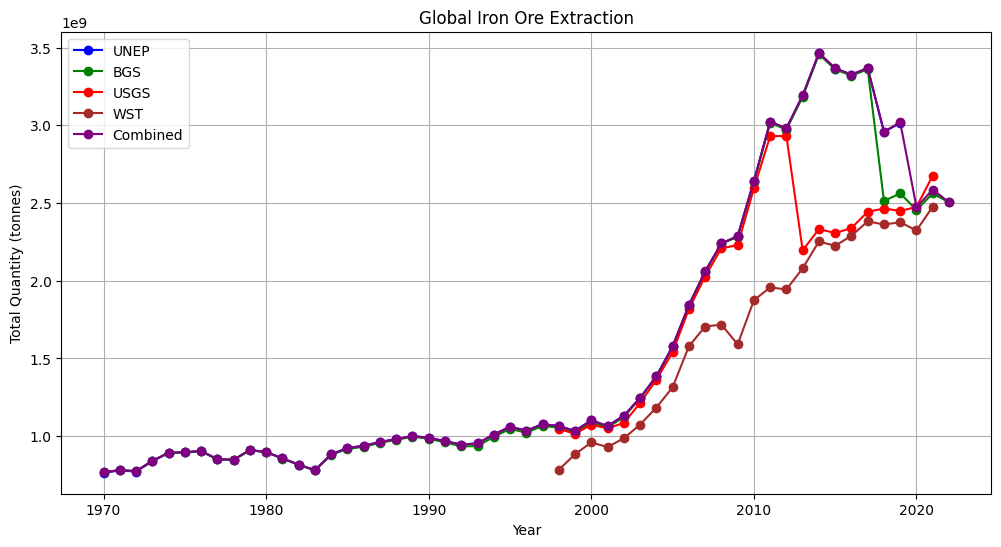

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming merged_df is already loaded and contains the correct columns
# Convert 'year' to datetime format if not already done
merged_df['year'] = pd.to_datetime(merged_df['year'], format='%Y')

# Group by 'year' and sum the quantities for each steel source, including 'steel_com'
global_sums = merged_df.groupby(merged_df['year'].dt.year).agg({
    'iron_mfd': 'sum',
    'iron_bgs': 'sum',
    'iron_usgs': 'sum',
    'iron_wst': 'sum',
    'iron_ore': 'sum'
}).reset_index()

# Replace 0 with np.nan to avoid plotting zeros
global_sums.replace(0, np.nan, inplace=True)

# Plotting the time series, NaNs will result in gaps
plt.figure(figsize=(12, 6))
plt.plot(global_sums['year'], global_sums['iron_mfd'], label='UNEP', color='blue', marker='o')
plt.plot(global_sums['year'], global_sums['iron_bgs'], label='BGS', color='green', marker='o')
plt.plot(global_sums['year'], global_sums['iron_usgs'], label='USGS', color='red', marker='o')
plt.plot(global_sums['year'], global_sums['iron_wst'], label='WST', color='brown', marker='o')
plt.plot(global_sums['year'], global_sums['iron_ore'], label='Combined', color='purple', marker='o')

# Adding titles and labels
plt.title('Global Iron Ore Extraction')
plt.xlabel('Year')
plt.ylabel('Total Quantity (tonnes)')
plt.grid(True)
plt.legend()
plt.savefig(plot_path + "global_iron_extraction.pdf", dpi=600)
# Show the plot
plt.show()


In [24]:
merged_df["source"].unique()

array([None, 'UNEP', 'USGS', 'BGS', 'WST'], dtype=object)

In [26]:
merged_df.to_csv(output_path + "iron_ore_merged.csv")

# Surrogate Variable 

In [27]:
# Address of Mountain Iron was missing! Manually added the address.  
df_iron = pd.read_csv(raw_path + "usa_iron_mines_MDRS.csv")
df_iron.rename({'Mine ID': 'MINE_ID'}, axis=1, inplace=True)
df_iron.columns = df_iron.columns.str.strip()
df_iron

,MINE_ID,Mine Name,Street,City,State,Zip Code,Status,Status Date,Type of Mine
0,100507,Blackburn Mine,NaN,BIRMINGHAM,Alabama,35202,Abandoned,1982-05-31,Surface
1,103025,DUDLEY RED #1,346 Rickey Road,Mc Calla,Alabama,35111,Active,1998-06-24,Surface
2,201922,Apache Pit Iropox Corp,P O Box 8816 Catalina Rural Branch,TUCSON,Arizona,85738,Abandoned,1981-02-17,Surface
3,201963,Coronado Facility,NaN,TUCSON,Arizona,85725,Abandoned,1981-02-17,Surface
4,202838,IRON CHANCELLAR,2389 E Coal Creek Rd,PRICE,Utah,84501,Abandoned,2000-04-24,Underground
...,...,...,...,...,...,...,...,...,...
168,4702607,DCS MILL,1050 East Bay St,MILWAUKEE,Wisconsin,53207,Abandoned,1998-02-23,Facility
169,4800144,Sunrise Mine And Mill,NaN,PUEBLO,Colorado,81002,Abandoned,1983-03-02,Underground
170,4800145,Atlantic City Ore Operations And Plant,NaN,LANDER,Wyoming,82520,Abandoned,1984-04-26,Surface
171,4800999,Chicago Pit,NaN,PUEBLO,Colorado,81002,Abandoned,1981-08-04,Surface


In [28]:
df_usa = pd.read_csv(raw_path + "Mines.txt",  encoding='ISO-8859-1', delimiter='|')
df_usa = df_usa[df_usa["PRIMARY_SIC"] == "Iron Ore"]
df_usa.columns = df_usa.columns.str.strip()
df_usa

,MINE_ID,CURRENT_MINE_NAME,COAL_METAL_IND,CURRENT_MINE_TYPE,CURRENT_MINE_STATUS,CURRENT_STATUS_DT,CURRENT_CONTROLLER_ID,CURRENT_CONTROLLER_NAME,CURRENT_OPERATOR_ID,CURRENT_OPERATOR_NAME,...,NO_NONPRODUCING_PITS,NO_TAILING_PONDS,PILLAR_RECOVERY_USED,HIGHWALL_MINER_USED,MULTIPLE_PITS,MINERS_REP_IND,SAFETY_COMMITTEE_IND,MILES_FROM_OFFICE,DIRECTIONS_TO_MINE,NEAREST_TOWN
134,100507,Blackburn Mine,M,Surface,Abandoned,05/31/1982,M38415,Shook A M Iii,L38415,Shook & Fletcher Supply Company,...,NaN,NaN,N,N,N,N,N,0,NaN,NaN
1995,103025,DUDLEY RED #1,M,Surface,Active,06/24/1998,M40371,Gerald Cobern,L14022,Alabama Pigments Co LLC,...,NaN,0.0,N,N,N,N,N,40,Mine behind Mercedes Plant. APC Plant Exit 97 ...,Woodstock
2984,201922,Apache Pit Iropox Corp,M,Surface,Abandoned,02/17/1981,M03853,Garner James,L04768,Garner & Associates,...,NaN,NaN,N,N,N,N,N,0,NaN,NaN
3025,201963,Coronado Facility,M,Surface,Abandoned,02/17/1981,M34514,Ewing W R,L34514,Inter Mountain Minerals Inc,...,NaN,NaN,N,N,N,N,N,0,NaN,NaN
3886,202838,IRON CHANCELLAR,M,Underground,Abandoned,04/24/2000,M04648,Arthur Marion Birch,L16787,Birch Development Company,...,NaN,NaN,N,N,N,N,N,150,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86906,4702607,DCS MILL,M,Facility,Abandoned,02/23/1998,M32302,Crawford James F,L32302,D C S Color & Supply Company Inc,...,NaN,NaN,N,N,N,N,N,0,NaN,NaN
88273,4800144,Sunrise Mine And Mill,M,Underground,Abandoned,03/02/1983,M00181,Crane Company,L00216,C F & I Steel Corp,...,NaN,NaN,N,N,N,N,N,0,NaN,NaN
88274,4800145,Atlantic City Ore Operations And Plant,M,Surface,Abandoned,04/26/1984,M00222,USX Corp (United States Steel Corp),L00275,United States Steel Corp,...,NaN,NaN,N,N,N,N,N,0,NaN,NaN
88418,4800999,Chicago Pit,M,Surface,Abandoned,08/04/1981,M00181,Crane Company,L00216,C F & I Steel Corp,...,NaN,NaN,N,N,N,N,N,0,NaN,NaN


In [29]:
# Merge df_iron with df_usgs on MINE_ID
df_iron = pd.merge(df_iron, df_usa[['MINE_ID', 'LONGITUDE', 'LATITUDE']], on='MINE_ID', how='left')
df_iron['Status Date'] = pd.to_datetime(df_iron['Status Date'], errors='coerce').dt.year

# df_iron = df_iron[(df_iron["Status"] != 'Abandoned') & (df_iron["Status Date"] > 2000)]
df_iron = df_iron[df_iron["Status Date"] > 2000]
df_iron

,MINE_ID,Mine Name,Street,City,State,Zip Code,Status,Status Date,Type of Mine,LONGITUDE,LATITUDE
5,203299,Drake Iron Ore,21803 N Scottsdale Rd Suite 220,Scottsdale,Arizona,85205,Abandoned,2018,Surface,-112.888056,35.332500
6,203387,Portable Crusher No. 1,4215 E McDowell Rd. Ste 201,Mesa,Arizona,85215,Intermittent,2024,Surface,-111.901667,33.426389
7,203416,Drake Ore Mine-south,525 S 7th Street,Cottonwood,Arizona,86326,Abandoned,2019,Surface,-113.083215,35.265729
8,203459,mountain mine,Mountain Iron,NaN,Minnesota,55768,Abandoned,2023,Surface,NaN,NaN
11,403569,Baxter Mine,18400 Falchion Road,Apple Valley,California,92307,Intermittent,2024,Surface,-115.994167,35.262778
15,405815,Beck Mine,755 GRAND BLVD STE 105B-316,Santa Rosa Beach,Florida,32550,Active,2018,Surface,-115.931944,35.789167
30,2001012,Empire Mine,"101 Tilden Mine Road, Co. Road PEE",Ishpeming,Michigan,49849,Abandoned,2017,Surface,-83.474722,42.363333
33,2003235,EXTEC 14 X 30 TROMMEL,599 Washington St,ISHPEMING,Michigan,49849,Abandoned,2008,Surface,NaN,NaN
34,2003314,SP-13,599 Washington Street,Ishpeming,Michigan,49849,Intermittent,2016,Surface,-87.664444,46.506944
35,2003372,Peterson Mine,2062 US 131 South,Petoskey,Michigan,49770,Intermittent,2024,Surface,-90.070000,46.466944


In [30]:
df_iron[df_iron['LONGITUDE'].isna()]

,MINE_ID,Mine Name,Street,City,State,Zip Code,Status,Status Date,Type of Mine,LONGITUDE,LATITUDE
8,203459,mountain mine,Mountain Iron,NaN,Minnesota,55768,Abandoned,2023,Surface,NaN,NaN
33,2003235,EXTEC 14 X 30 TROMMEL,599 Washington St,ISHPEMING,Michigan,49849,Abandoned,2008,Surface,NaN,NaN
37,2100200,EVTAC MINE,NaN,EVELETH,Minnesota,55734,Abandoned,2003,Surface,NaN,NaN
40,2100249,NAT'L STEEL PELLET CO (MINE),NaN,KEEWATIN,Minnesota,55753,Abandoned,2003,Surface,NaN,NaN
44,2100256,"Cliffs Erie, LLC.",Highway 110,Hoyt Lakes,Minnesota,55750,Abandoned,2005,Surface,NaN,NaN
68,2100828,EVTAC PLANT,NaN,EVELETH,Minnesota,55734,Abandoned,2003,Facility,NaN,NaN
89,2103073,AUBURN MINE,NaN,VIRGINIA,Minnesota,55792,Abandoned,2002,Surface,NaN,NaN
90,2103337,CEC-2,8822 Norway Ridge Road,Forbes,Minnesota,55738,Abandoned,2008,Surface,NaN,NaN
92,2103342,CECI-Roadrunner,8822 Norway Ridge Road,Forbes,Minnesota,55738,Abandoned,2008,Surface,NaN,NaN
96,2103561,Cedar Rapids 9000,822 Norway Ridge Road,Forbes,Minnesota,55738,Abandoned,2008,Surface,NaN,NaN


<Axes: >

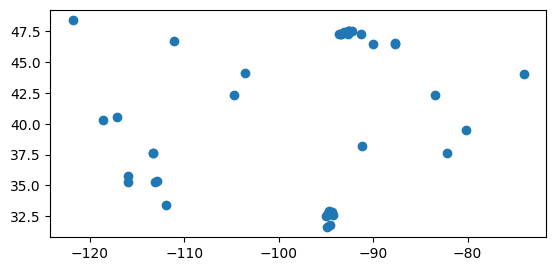

In [31]:
# Create geometry using the lat, lon
geometry = [Point(xy) for xy in zip(df_iron['LONGITUDE'], df_iron['LATITUDE'])]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df_iron, geometry=geometry)

# Set the coordinate reference system (CRS) to WGS84
gdf.set_crs(epsg=4326, inplace=True)

# Save the GeoDataFrame as a shapefile
gdf.to_file(output_path + "usa_iron_mines.shp")

gdf.plot()

These USA mines are incorporated with the USGS mining points and got a combined iron ore mines. 

In [32]:
# usgs mining points
usgs_point = gpd.read_file(raw_path + "iron_ore_mining.shp")
usgs_point

,DEP_ID,SITE_NAME,DEV_STAT,URL,CODE_LIST,lat,lon,CODE,geometry
0,10003697,Huya and Siwangpu,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE,32.20755,104.51410,MN FE,POINT (104.5141 32.20755)
1,10003707,Diaoshigou,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE PB,41.79809,96.39988,MN FE PB,POINT (96.39988 41.79809)
2,10003708,Dongping,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE,23.20768,106.60796,MN FE,POINT (106.60796 23.20768)
3,10003726,Jiaoling,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE,24.66593,116.23270,MN FE,POINT (116.2327 24.66593)
4,10003732,Lianzhou,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE AU AG,22.80773,111.50922,MN FE AU AG,POINT (111.50922 22.80773)
...,...,...,...,...,...,...,...,...,...
1061,None,Shiyela,None,None,None,0.00000,0.00000,None,POINT (14.84222 -22.93833)
1062,None,Safari Minero,None,None,None,0.00000,0.00000,None,POINT (-56.34438 -30.8655)
1063,None,Zapucay,None,None,None,0.00000,0.00000,None,POINT (-55.31711 -31.66367)
1064,None,Minas de Corrales,None,None,None,0.00000,0.00000,None,POINT (-55.51428 -31.58733)


In [33]:
from shapely.geometry import Point

# New coordinates to add
new_longitude = 0.8128893893573983
new_latitude = 9.316452005259045

# Create a new point geometry
new_point = Point(new_longitude, new_latitude)

# Create a new GeoDataFrame with the single point
new_row = gpd.GeoDataFrame(
    {'geometry': [new_point],
     "SITE_NAME": "Tchotougou iron ore mine"},  # Geometry column with the new point
    crs=usgs_point.crs          # Match the coordinate reference system (CRS) of the existing GeoDataFrame
)

# Append the new row to the existing GeoDataFrame
usgs_point = gpd.GeoDataFrame(
    pd.concat([usgs_point, new_row], ignore_index=True),
    crs=usgs_point.crs
)

# Display the updated GeoDataFrame
usgs_point

,DEP_ID,SITE_NAME,DEV_STAT,URL,CODE_LIST,lat,lon,CODE,geometry
0,10003697,Huya and Siwangpu,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE,32.20755,104.51410,MN FE,POINT (104.5141 32.20755)
1,10003707,Diaoshigou,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE PB,41.79809,96.39988,MN FE PB,POINT (96.39988 41.79809)
2,10003708,Dongping,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE,23.20768,106.60796,MN FE,POINT (106.60796 23.20768)
3,10003726,Jiaoling,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE,24.66593,116.23270,MN FE,POINT (116.2327 24.66593)
4,10003732,Lianzhou,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE AU AG,22.80773,111.50922,MN FE AU AG,POINT (111.50922 22.80773)
...,...,...,...,...,...,...,...,...,...
1062,None,Safari Minero,None,None,None,0.00000,0.00000,None,POINT (-56.34438 -30.8655)
1063,None,Zapucay,None,None,None,0.00000,0.00000,None,POINT (-55.31711 -31.66367)
1064,None,Minas de Corrales,None,None,None,0.00000,0.00000,None,POINT (-55.51428 -31.58733)
1065,None,Valentines,None,None,None,0.00000,0.00000,None,POINT (-55.12367 -33.24569)


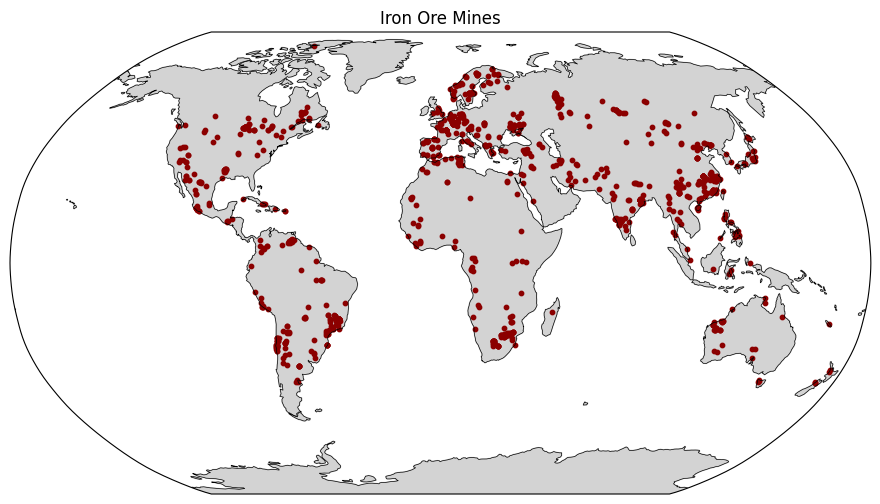

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load your shapefile
gdf = usgs_point
gdf = gdf.to_crs(epsg=4326)  # Ensure data is in latitude and longitude

# Define the Robinson projection
projection = ccrs.Robinson()

# Create a subplot with the Robinson projection
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(12, 6))

# Plotting the points
# Converting GeoDataFrame to use the `.plot` method from matplotlib for GeoDataFrames
gdf.plot(ax=ax, transform=ccrs.Geodetic(), marker='o', color='darkred', markersize=10)

# Adding geographical features
ax.coastlines(resolution='110m', color='black', linewidth=0.5)
ax.add_feature(cfeature.LAND, color='lightgray',linewidth=1)
ax.set_global()  # Optionally set a global extent

# Set the title
ax.set_title('Iron Ore Mines')

plt.savefig(plot_path + "iron_ore_mines.pdf", dpi=600, bbox_inches='tight')

# Display the plot
plt.show()


In [37]:
source = (
    "USA: Mine Data Retrieval System from Mine Safety and Health Administration.\n"
    "Missing Countries: Manual Google Search from multiple sources.\n"
    "Rest of the World: Mineral Resources Data System (MRDS)."
)

ds_mine = ssm.point_2_grid(usgs_point, variable_name="iron_ore_mines", long_name="Iron Ore Mining Location",
                     units="mine per grid", source=source, verbose="yes")
ds_mine

Global stats before gridding : 1067.00
Global stats after gridding: 1067.00


<xarray.Dataset> Size: 2MB
Dimensions:         (lat: 180, lon: 360)
Coordinates:
  * lat             (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon             (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Data variables:
    iron_ore_mines  (lat, lon) float64 518kB nan nan nan nan ... nan nan nan nan
    grid_area       (lat, lon) float64 518kB ...
    land_frac       (lat, lon) float64 518kB ...
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

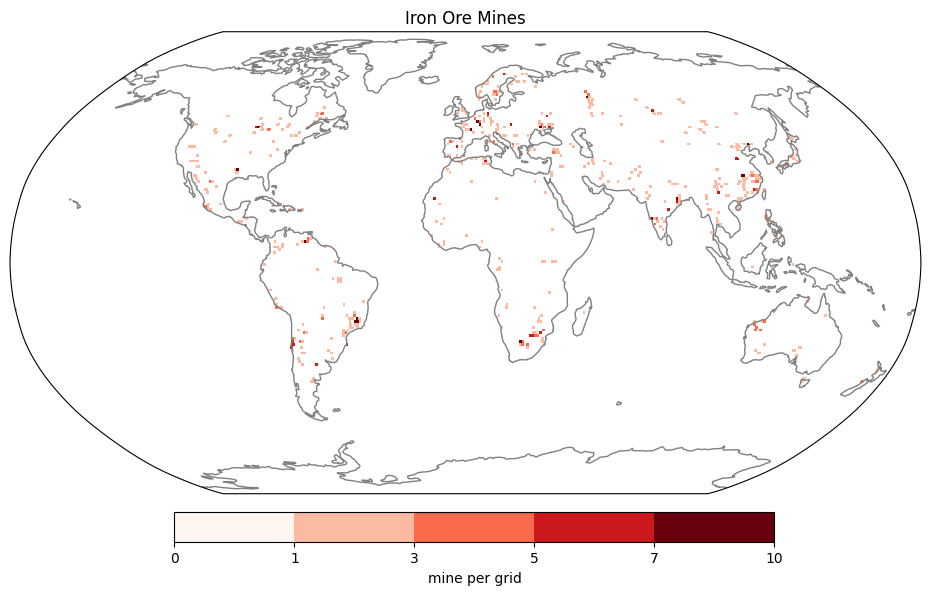

<GeoAxes: title={'center': 'Iron Ore Mines'}>

In [38]:
ssm.plot_map(ds_mine, "iron_ore_mines", color="Reds", title="Iron Ore Mines", label="mine per grid", levels=[0, 1, 3, 5, 7, 10],
            output_dir=plot_path, filename="iron_ore_mines_grid")

# Dasymetric Mapping

In [46]:
# Load the data from the CSV file
df = pd.read_csv(output_path + "iron_ore_merged.csv")
df['year'] = pd.to_datetime(df['year'])
df = df[(df['year'].dt.year >= 2000) & (df['year'].dt.year <= 2022)]
df['iron_ore'] = df['iron_ore'] * 1e6
df

,Unnamed: 0,ISO3,year,iron_mfd,source_mdf,country_trans,iron_bgs,source_bgs,iron_usgs,source_usgs,Country,iron_wst,source_wst,iron_ore,source
30,30,ABW,2000-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,31,ABW,2001-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,32,ABW,2002-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,33,ABW,2003-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,34,ABW,2004-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,10861,ZWE,2017-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN
10862,10862,ZWE,2018-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN
10863,10863,ZWE,2019-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN
10864,10864,ZWE,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN


In [47]:
df["iron_ore"].sum()

np.float64(5.4846957993837544e+16)

In [48]:
# We do not have any mining points in Montenegro. 
# Therefore, assuming that the mine in 2000 was from Serbia, we copy the production value to SRB and drop Serbia and Montenegro row
# Get the value for "Serbia and Montenegro"
srb = df[df["country_trans"] == "Serbia and Montenegro"]

# Assuming you have 'iron_ore' column in the target DataFrame
# Set the value in rows where ISO3 is "SRB" or "MNE" and year is "2000-01-01"
df.loc[(df['ISO3'].isin(["SRB"])) & (df['year'] == "2000-01-01"), 'iron_ore'] = srb

# Drop rows where 'country_trans' is "Serbia and Montenegro"
df = df[df["country_trans"] != "Serbia and Montenegro"]

df

,Unnamed: 0,ISO3,year,iron_mfd,source_mdf,country_trans,iron_bgs,source_bgs,iron_usgs,source_usgs,Country,iron_wst,source_wst,iron_ore,source
30,30,ABW,2000-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,31,ABW,2001-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,32,ABW,2002-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,33,ABW,2003-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,34,ABW,2004-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,10861,ZWE,2017-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN
10862,10862,ZWE,2018-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN
10863,10863,ZWE,2019-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN
10864,10864,ZWE,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN


In [49]:
df["iron_ore"].sum()

np.float64(5.4846956878837544e+16)

In [51]:
source = (
    "Disaggregated UNEP IRP Global Material Flows Database. (1970-2019).\n"
    "British Geological Survey. (1970-2022). World Mineral Statistics Dataset.\n"
    "USGS Iron Ore Statistics and Information (1998-2021).\n"
    "World Steel Association (1998-2021)."
)

years = list(sorted((df["year"].unique())))

dataset_list = []
for time in years:
    print(time)
    df_filtered = df[df["year"] == time].reset_index()
    ds = ssm.table_2_grid(surrogate_data=ds_mine, surrogate_variable="iron_ore_mines", tabular_column="iron_ore", 
                    tabular_data=df_filtered, variable_name="iron_ore", long_name="Iron Ore Extraction", units="g m-2 y-1", source=source,
                    time=time, normalize_by_area=True, verbose=True)
    dataset_list.append(ds)

merged_ds = xr.merge(dataset_list)
merged_ds

2000-01-01 00:00:00
Country Not Found: ['YUG', 'SUN']
Distributing iron_ore onto iron_ore_mines.
Global sum of jurisdictional dataset : 1102284461309211.0
Global stats after gridding: 1102284461309211.00
2001-01-01 00:00:00
Country Not Found: ['YUG', 'SCG', 'SUN']
Distributing iron_ore onto iron_ore_mines.
Global sum of jurisdictional dataset : 1064828247641602.0
Global stats after gridding: 1064828247641602.00
2002-01-01 00:00:00
Country Not Found: ['YUG', 'SCG', 'SUN']
Distributing iron_ore onto iron_ore_mines.
Global sum of jurisdictional dataset : 1131775610339600.0
Global stats after gridding: 1131775610339600.00
2003-01-01 00:00:00
Country Not Found: ['YUG', 'SCG', 'SUN']
Distributing iron_ore onto iron_ore_mines.
Global sum of jurisdictional dataset : 1245848254320724.8
Global stats after gridding: 1245848254320724.75
2004-01-01 00:00:00
Country Not Found: ['YUG', 'SCG', 'SUN']
Distributing iron_ore onto iron_ore_mines.
Global sum of jurisdictional dataset : 1384796255933922.8
G

<xarray.Dataset> Size: 13MB
Dimensions:    (lat: 180, lon: 360, time: 23)
Coordinates:
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time       (time) datetime64[ns] 184B 2000-01-01 2001-01-01 ... 2022-01-01
Data variables:
    iron_ore   (time, lat, lon) float64 12MB nan nan nan nan ... nan nan nan nan
    grid_area  (lat, lon) float64 518kB 1.089e+08 1.089e+08 ... 1.089e+08
    land_frac  (lat, lon) float64 518kB 0.005732 0.005732 0.005732 ... 0.0 0.0
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

In [52]:
ds_merged = xr.merge([merged_ds, ds_mine])
ds_merged

<xarray.Dataset> Size: 13MB
Dimensions:         (lat: 180, lon: 360, time: 23)
Coordinates:
  * lat             (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon             (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time            (time) datetime64[ns] 184B 2000-01-01 ... 2022-01-01
Data variables:
    iron_ore        (time, lat, lon) float64 12MB nan nan nan ... nan nan nan
    grid_area       (lat, lon) float64 518kB 1.089e+08 1.089e+08 ... 1.089e+08
    land_frac       (lat, lon) float64 518kB 0.005732 0.005732 ... 0.0 0.0
    iron_ore_mines  (lat, lon) float64 518kB nan nan nan nan ... nan nan nan nan
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

In [53]:
ds_merged.to_netcdf(output_path + "L.iron_ore.2000-2022.a.nc")

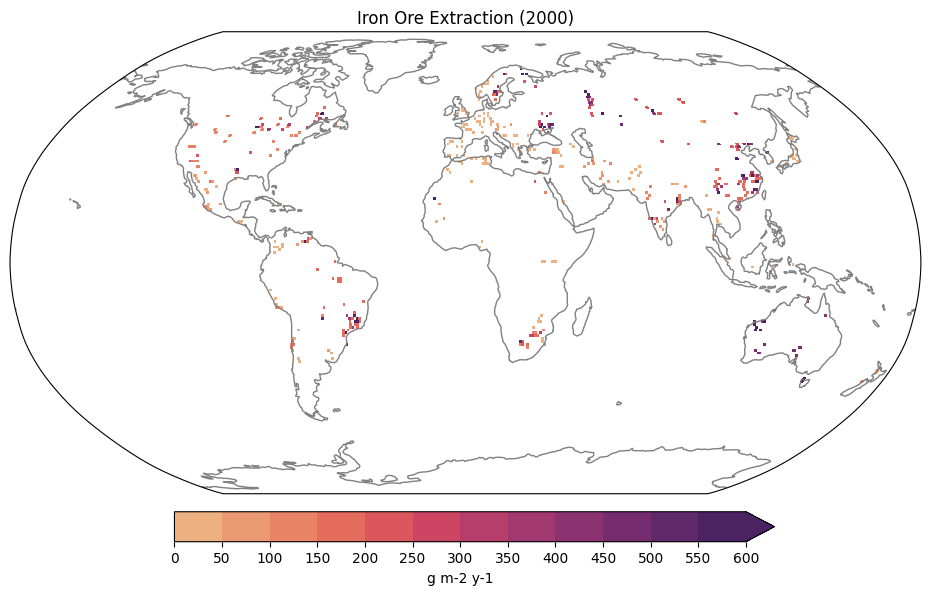

<GeoAxes: title={'center': 'Iron Ore Extraction (2000)'}>

In [55]:
ds = xr.open_dataset(output_path + "L.iron_ore.2000-2022.a.nc")
dd = ds.sel(time="2000-01-01")
ssm.plot_map(dd, "iron_ore", color="flare", levels=12, vmin=0, vmax=600, extend_max=True, label="g m-2 y-1", title="Iron Ore Extraction (2000)")

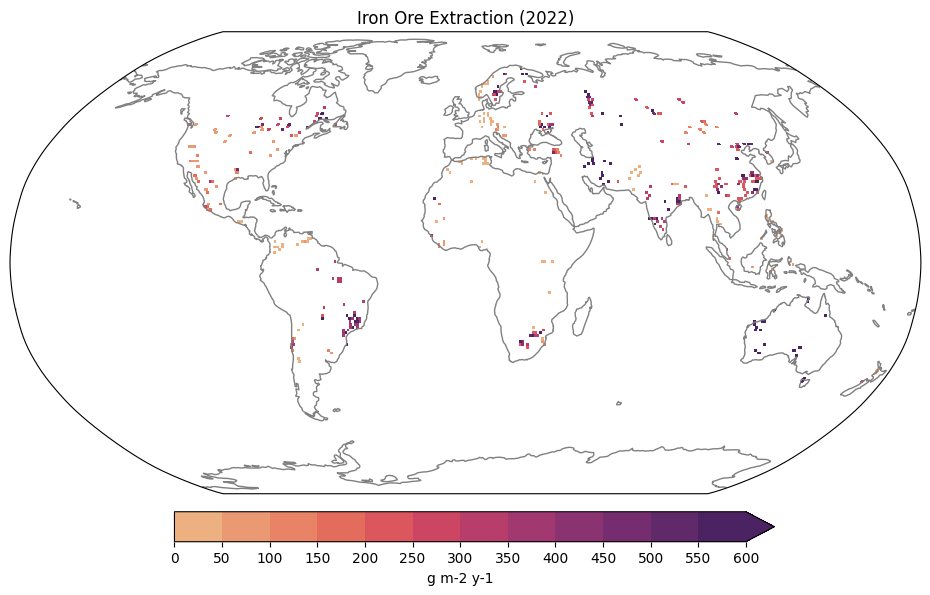

<GeoAxes: title={'center': 'Iron Ore Extraction (2022)'}>

In [56]:
dd = ds.sel(time="2022-01-01")
ssm.plot_map(dd, "iron_ore", color="flare", levels=12, vmin=0, vmax=600, extend_max=True, label="g m-2 y-1", title="Iron Ore Extraction (2022)")

# Grade Calculation

In [57]:
# Pre-porcess the raw data
# Read the Excel file, ensuring the first row is treated as data (not as column headers)
df = pd.read_excel(raw_path + "USGS_IronOre_PigIron_Steel.xlsx", sheet_name="iron_ore")

# # Add 'Y' in front of each column name if it's a year
# df.columns = ['Y' + str(col) if isinstance(col, int) or col.isdigit() else col for col in df.columns]

# Remove the last row
df = df.drop(df.index[-1])

# Replace "Macedonia" with "North Macedonia" in the "Country" column
df['Country'] = df['Country'].replace('Macedonia', 'North Macedonia')

# Reset the index if necessary
df = df.reset_index(drop=True)

# Optionally, convert the remaining data to the appropriate types
df = df.apply(pd.to_numeric, errors='ignore')
df = ssm.add_iso3_column(df, "Country")
# Reshape the DataFrame
usgs_iron = df.melt(id_vars=['ISO3', "Country"], var_name='year', value_name='iron_usgs')
# convert thousand tonnes to tonnes
usgs_iron["iron_usgs"] = usgs_iron["iron_usgs"] * 1e3
# Ensure 'year' is in datetime format
usgs_iron['year'] = pd.to_datetime(usgs_iron['year'], format='%Y')
# Extract only the year
usgs_iron['year'] = usgs_iron['year'].dt.year
usgs_iron["source_usgs"] = "USGS"
usgs_iron

,ISO3,Country,year,iron_usgs,source_usgs
0,DZA,Algeria,1998,1783000.0,USGS
1,ARG,Argentina,1998,NaN,USGS
2,AUS,Australia,1998,155731000.0,USGS
3,AUT,Austria,1998,1797000.0,USGS
4,AZE,Azerbaijan,1998,6600.0,USGS
...,...,...,...,...,...
1507,USA,United States,2021,47500000.0,USGS
1508,URY,Uruguay,2021,8000.0,USGS
1509,VEN,Venezuela,2021,2257000.0,USGS
1510,VNM,Viet Nam,2021,3651000.0,USGS


In [58]:
# Pre-porcess the raw data
# Read the Excel file, ensuring the first row is treated as data (not as column headers)
df = pd.read_excel(raw_path + "USGS_IronOre_PigIron_Steel.xlsx", sheet_name="metal_content")

# # Add 'Y' in front of each column name if it's a year
# df.columns = ['Y' + str(col) if isinstance(col, int) or col.isdigit() else col for col in df.columns]

# Remove the last row
df = df.drop(df.index[-1])

# Replace "Macedonia" with "North Macedonia" in the "Country" column
df['Country'] = df['Country'].replace('Macedonia', 'North Macedonia')

# Reset the index if necessary
df = df.reset_index(drop=True)
# Optionally, convert the remaining data to the appropriate types
df = df.apply(pd.to_numeric, errors='ignore')
df = ssm.add_iso3_column(df, "Country")
df

,Country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,ISO3
0,Algeria,900.000,680.000,830.000,790.0,1060.0,700.0,780.00,800.00,1180.00,...,565.0,483.0,500.0,323.0,263.0,374.0,402.0,399.0,318.0,DZA
1,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2200.0,2260.0,1820.0,1460.0,2110.0,ARG
2,Australia,99418.888,95223.000,104226.000,112592.0,113548.0,132257.0,145282.00,165621.00,170934.00,...,377760.0,457409.0,500994.0,531075.0,548297.0,560055.0,567957.0,564141.0,565032.0,AUS
3,Austria,500.000,500.000,500.000,575.0,575.0,702.5,602.00,640.00,600.00,...,743.0,780.0,891.0,889.0,954.0,897.0,897.0,843.0,840.0,AUT
4,Azerbaijan,3.630,NaN,NaN,NaN,NaN,1.8,9.55,3.65,5.65,...,68.0,44.0,61.0,12.0,NaN,NaN,NaN,NaN,NaN,AZE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,United States,39724.000,36530.000,39703.000,29263.0,32499.0,30600.0,34500.00,34200.00,33300.00,...,33300.0,35400.0,28800.0,26400.0,30300.0,31300.0,29800.0,24100.0,30100.0,USA
59,Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,6.0,5.0,1.0,2.0,4.0,4.0,2.0,5.0,URY
60,Venezuela,11014.203,9292.217,11092.013,10817.0,11500.0,11936.0,12669.00,13000.00,15200.00,...,7000.0,7000.0,7300.0,7500.0,2500.0,1550.0,685.0,487.0,1410.0,VEN
61,Vietnam,NaN,NaN,NaN,NaN,NaN,540.0,495.00,504.70,510.00,...,2495.0,2719.0,2691.0,3056.0,2920.0,2962.0,3236.0,1890.0,1940.0,VNM


In [59]:
# Reshape the DataFrame
usgs_metal = df.melt(id_vars=['ISO3', "Country"], var_name='year', value_name='metal_usgs')
# convert thousand tonnes to tonnes
usgs_metal["metal_usgs"] = usgs_metal["metal_usgs"] * 1e3
# Ensure 'year' is in datetime format
usgs_metal['year'] = pd.to_datetime(usgs_metal['year'], format='%Y')
# Extract only the year
usgs_metal['year'] = usgs_metal['year'].dt.year
usgs_metal

,ISO3,Country,year,metal_usgs
0,DZA,Algeria,1998,900000.0
1,ARG,Argentina,1998,NaN
2,AUS,Australia,1998,99418888.0
3,AUT,Austria,1998,500000.0
4,AZE,Azerbaijan,1998,3630.0
...,...,...,...,...
1507,USA,United States,2021,30100000.0
1508,URY,Uruguay,2021,5000.0
1509,VEN,Venezuela,2021,1410000.0
1510,VNM,Vietnam,2021,1940000.0


In [60]:
merged_df = usgs_iron.merge(usgs_metal, on=["ISO3", "year"], how='left')
merged_df.rename(columns={'Country_x': "Country"}, inplace=True)
merged_df.drop(columns='Country_y', inplace=True)
merged_df["grade"] = merged_df["metal_usgs"] / merged_df["iron_usgs"]
# Set the grade to NaN for years 2003 and onward for Portugal as the iron ore and metal contents are estimated and doesn't represent previous year's grade
merged_df.loc[(merged_df["Country"] == "Portugal") & (merged_df["year"] >= 2003), "grade"] = np.nan
# Guatemala in 2003 doesn't match with the previous years, so setting grade for 2009 as NaN
merged_df.loc[(merged_df["Country"] == "Guatemala") & (merged_df["year"] == 2009), "grade"] = np.nan
merged_df['year'] = pd.to_datetime(merged_df['year'], format='%Y')
merged_df


,ISO3,Country,year,iron_usgs,source_usgs,metal_usgs,grade
0,DZA,Algeria,1998-01-01,1783000.0,USGS,900000.0,0.504767
1,ARG,Argentina,1998-01-01,NaN,USGS,NaN,NaN
2,AUS,Australia,1998-01-01,155731000.0,USGS,99418888.0,0.638401
3,AUT,Austria,1998-01-01,1797000.0,USGS,500000.0,0.278242
4,AZE,Azerbaijan,1998-01-01,6600.0,USGS,3630.0,0.550000
...,...,...,...,...,...,...,...
1507,USA,United States,2021-01-01,47500000.0,USGS,30100000.0,0.633684
1508,URY,Uruguay,2021-01-01,8000.0,USGS,5000.0,0.625000
1509,VEN,Venezuela,2021-01-01,2257000.0,USGS,1410000.0,0.624723
1510,VNM,Viet Nam,2021-01-01,3651000.0,USGS,1940000.0,0.531361


In [61]:
merged_df[merged_df["ISO3"] == "CHN"]

,ISO3,Country,year,iron_usgs,source_usgs,metal_usgs,grade
11,CHN,China,1998-01-01,2.470000e+08,USGS,81200000.0,0.328745
74,CHN,China,1999-01-01,2.370000e+08,USGS,78200000.0,0.329958
137,CHN,China,2000-01-01,2.230000e+08,USGS,73500000.0,0.329596
200,CHN,China,2001-01-01,2.200000e+08,USGS,72600000.0,0.330000
263,CHN,China,2002-01-01,2.310000e+08,USGS,76200000.0,0.329870
326,CHN,China,2003-01-01,2.610000e+08,USGS,86000000.0,0.329502
389,CHN,China,2004-01-01,3.200000e+08,USGS,105000000.0,0.328125
452,CHN,China,2005-01-01,4.200000e+08,USGS,138000000.0,0.328571
515,CHN,China,2006-01-01,6.010000e+08,USGS,198000000.0,0.329451
578,CHN,China,2007-01-01,7.070000e+08,USGS,233000000.0,0.329562


The U.S. Geological Survey (USGS) revised its global iron ore production data to better reflect the usable iron content, especially for China. Previously, China's production figures were reported based on crude ore, which included material with very low iron content. The revision aimed to present data on a usable ore basis, aligning with international standards and providing a more accurate representation of iron content.
Source: https://pubs.usgs.gov/ja/70238858/report.pdf

In [62]:
# Create the DataFrame with the provided data
data = {
    "ISO3": ["CHN"] * 16,
    "year": list(range(2000, 2016)),
    "Crude Ore": [223, 211, 233, 263, 320, 420, 597, 707, 780, 885, 1080, 1340, 1330, 1450, 1510, 1380],
    "Usable Ore": [112, 108, 115, 127, 156, 186, 237, 345, 339, 374, 371, 442, 420, 417, 410, 375],
    "Iron Content": [69, 67, 71, 79, 97, 115, 147, 214, 210, 232, 230, 274, 261, 259, 254, 232]
}

# Convert to DataFrame
df_chn = pd.DataFrame(data)
df_chn["year"] = pd.to_datetime(df_chn["year"].astype(str) + "-01-01")
df_chn["ratio_crude_vs_usable"] = df_chn["Crude Ore"] / df_chn["Usable Ore"]
df_chn["garde_usable"] = df_chn["Iron Content"] / df_chn["Usable Ore"]
df_chn["grade"] = df_chn["Iron Content"] / df_chn["Crude Ore"]
df_chn

,ISO3,year,Crude Ore,Usable Ore,Iron Content,ratio_crude_vs_usable,garde_usable,grade
0,CHN,2000-01-01,223,112,69,1.991071,0.616071,0.309417
1,CHN,2001-01-01,211,108,67,1.953704,0.620370,0.317536
2,CHN,2002-01-01,233,115,71,2.026087,0.617391,0.304721
3,CHN,2003-01-01,263,127,79,2.070866,0.622047,0.300380
4,CHN,2004-01-01,320,156,97,2.051282,0.621795,0.303125
5,CHN,2005-01-01,420,186,115,2.258065,0.618280,0.273810
6,CHN,2006-01-01,597,237,147,2.518987,0.620253,0.246231
7,CHN,2007-01-01,707,345,214,2.049275,0.620290,0.302687
8,CHN,2008-01-01,780,339,210,2.300885,0.619469,0.269231
9,CHN,2009-01-01,885,374,232,2.366310,0.620321,0.262147


In [63]:
# Step 1: Set grade to NaN only for CHN
merged_df.loc[merged_df["ISO3"] == "CHN", "grade"] = np.nan

# Step 2: Create lookup Series from df_chn
grade_lookup = df_chn.set_index(["ISO3", "year"])["grade"]

# Step 3: Fill CHN grade values from df_chn based on ISO3 and year
merged_df.loc[merged_df["ISO3"] == "CHN", "grade"] = (
    merged_df[merged_df["ISO3"] == "CHN"]
    .set_index(["ISO3", "year"])
    .index.map(grade_lookup)
)
merged_df

,ISO3,Country,year,iron_usgs,source_usgs,metal_usgs,grade
0,DZA,Algeria,1998-01-01,1783000.0,USGS,900000.0,0.504767
1,ARG,Argentina,1998-01-01,NaN,USGS,NaN,NaN
2,AUS,Australia,1998-01-01,155731000.0,USGS,99418888.0,0.638401
3,AUT,Austria,1998-01-01,1797000.0,USGS,500000.0,0.278242
4,AZE,Azerbaijan,1998-01-01,6600.0,USGS,3630.0,0.550000
...,...,...,...,...,...,...,...
1507,USA,United States,2021-01-01,47500000.0,USGS,30100000.0,0.633684
1508,URY,Uruguay,2021-01-01,8000.0,USGS,5000.0,0.625000
1509,VEN,Venezuela,2021-01-01,2257000.0,USGS,1410000.0,0.624723
1510,VNM,Viet Nam,2021-01-01,3651000.0,USGS,1940000.0,0.531361


In [64]:
merged_df[merged_df["ISO3"] == "CHN"]

,ISO3,Country,year,iron_usgs,source_usgs,metal_usgs,grade
11,CHN,China,1998-01-01,2.470000e+08,USGS,81200000.0,NaN
74,CHN,China,1999-01-01,2.370000e+08,USGS,78200000.0,NaN
137,CHN,China,2000-01-01,2.230000e+08,USGS,73500000.0,0.309417
200,CHN,China,2001-01-01,2.200000e+08,USGS,72600000.0,0.317536
263,CHN,China,2002-01-01,2.310000e+08,USGS,76200000.0,0.304721
326,CHN,China,2003-01-01,2.610000e+08,USGS,86000000.0,0.300380
389,CHN,China,2004-01-01,3.200000e+08,USGS,105000000.0,0.303125
452,CHN,China,2005-01-01,4.200000e+08,USGS,138000000.0,0.273810
515,CHN,China,2006-01-01,6.010000e+08,USGS,198000000.0,0.246231
578,CHN,China,2007-01-01,7.070000e+08,USGS,233000000.0,0.302687


In [66]:
# Load the data from the CSV file
df = pd.read_csv(output_path + "iron_ore_merged.csv")
df['year'] = pd.to_datetime(df['year'])
df = df[(df['year'].dt.year >= 2000) & (df['year'].dt.year <= 2022)]
df['iron_ore'] = df['iron_ore'] * 1e6
df

,Unnamed: 0,ISO3,year,iron_mfd,source_mdf,country_trans,iron_bgs,source_bgs,iron_usgs,source_usgs,Country,iron_wst,source_wst,iron_ore,source
30,30,ABW,2000-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,31,ABW,2001-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,32,ABW,2002-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,33,ABW,2003-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,34,ABW,2004-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,10861,ZWE,2017-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN
10862,10862,ZWE,2018-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN
10863,10863,ZWE,2019-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN
10864,10864,ZWE,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN


In [67]:
df["iron_ore"].sum()

np.float64(5.4846957993837544e+16)

In [68]:
# We do not have any mining points in Montenegro. 
# Therefore, assuming that the mine in 2000 was from Serbia, we copy the production value to SRB and drop Serbia and Montenegro row
# Get the value for "Serbia and Montenegro"
srb = df[df["country_trans"] == "Serbia and Montenegro"]

# Assuming you have 'iron_ore' column in the target DataFrame
# Set the value in rows where ISO3 is "SRB" or "MNE" and year is "2000-01-01"
df.loc[(df['ISO3'].isin(["SRB"])) & (df['year'] == "2000-01-01"), 'iron_ore'] = srb

# Drop rows where 'country_trans' is "Serbia and Montenegro"
df = df[df["country_trans"] != "Serbia and Montenegro"]

df

,Unnamed: 0,ISO3,year,iron_mfd,source_mdf,country_trans,iron_bgs,source_bgs,iron_usgs,source_usgs,Country,iron_wst,source_wst,iron_ore,source
30,30,ABW,2000-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,31,ABW,2001-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,32,ABW,2002-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,33,ABW,2003-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,34,ABW,2004-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,10861,ZWE,2017-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN
10862,10862,ZWE,2018-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN
10863,10863,ZWE,2019-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN
10864,10864,ZWE,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN


In [69]:
df["iron_ore"].sum()

np.float64(5.4846956878837544e+16)

In [70]:
merged_df[merged_df["ISO3"] == "TGO"]

,ISO3,Country,year,iron_usgs,source_usgs,metal_usgs,grade
52,TGO,Togo,1998-01-01,NaN,USGS,NaN,NaN
115,TGO,Togo,1999-01-01,NaN,USGS,NaN,NaN
178,TGO,Togo,2000-01-01,NaN,USGS,NaN,NaN
241,TGO,Togo,2001-01-01,NaN,USGS,NaN,NaN
304,TGO,Togo,2002-01-01,NaN,USGS,NaN,NaN
367,TGO,Togo,2003-01-01,NaN,USGS,NaN,NaN
430,TGO,Togo,2004-01-01,NaN,USGS,NaN,NaN
493,TGO,Togo,2005-01-01,NaN,USGS,NaN,NaN
556,TGO,Togo,2006-01-01,NaN,USGS,NaN,NaN
619,TGO,Togo,2007-01-01,NaN,USGS,NaN,NaN


In [71]:
merged_df = df.merge(merged_df[["ISO3", "year","grade"]], on=["ISO3", "year"], how='left')
merged_df

,Unnamed: 0,ISO3,year,iron_mfd,source_mdf,country_trans,iron_bgs,source_bgs,iron_usgs,source_usgs,Country,iron_wst,source_wst,iron_ore,source,grade
0,30,ABW,2000-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31,ABW,2001-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32,ABW,2002-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33,ABW,2003-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34,ABW,2004-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465,10861,ZWE,2017-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN,NaN
4466,10862,ZWE,2018-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN,NaN
4467,10863,ZWE,2019-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN,NaN
4468,10864,ZWE,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN,NaN


In [72]:
# Step 1: Calculate the country-specific averages
country_avg_grades = merged_df.groupby("ISO3")["grade"].mean()

# Step 2: Calculate the global average grade
global_avg_grade = merged_df["grade"].mean()

# Step 3: Define a function to fill missing values
def fill_grades(row):
    if pd.isna(row["grade"]):
        # Check if the country-specific average is available
        if not pd.isna(country_avg_grades.get(row["ISO3"])):
            return country_avg_grades[row["ISO3"]]
        else:
            # If no country-specific average, use global average
            return global_avg_grade
    else:
        # If grade is already present, return as is
        return row["grade"]

# Step 4: Apply the function to fill missing grades
merged_df["grade"] = merged_df.apply(fill_grades, axis=1)
merged_df

,Unnamed: 0,ISO3,year,iron_mfd,source_mdf,country_trans,iron_bgs,source_bgs,iron_usgs,source_usgs,Country,iron_wst,source_wst,iron_ore,source,grade
0,30,ABW,2000-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534735
1,31,ABW,2001-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534735
2,32,ABW,2002-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534735
3,33,ABW,2003-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534735
4,34,ABW,2004-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465,10861,ZWE,2017-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN,0.491290
4466,10862,ZWE,2018-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN,0.491290
4467,10863,ZWE,2019-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN,0.491290
4468,10864,ZWE,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN,0.491290


In [73]:
merged_df["grade"].mean()

np.float64(0.5259227641375157)

In [74]:
merged_df["metal_content"] = merged_df["iron_ore"] * merged_df["grade"] 
merged_df

,Unnamed: 0,ISO3,year,iron_mfd,source_mdf,country_trans,iron_bgs,source_bgs,iron_usgs,source_usgs,Country,iron_wst,source_wst,iron_ore,source,grade,metal_content
0,30,ABW,2000-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534735,NaN
1,31,ABW,2001-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534735,NaN
2,32,ABW,2002-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534735,NaN
3,33,ABW,2003-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534735,NaN
4,34,ABW,2004-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534735,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465,10861,ZWE,2017-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN,0.491290,NaN
4466,10862,ZWE,2018-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN,0.491290,NaN
4467,10863,ZWE,2019-01-01,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN,0.491290,NaN
4468,10864,ZWE,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN,0.491290,NaN


In [75]:
merged_df["metal_content"].sum()

np.float64(2.691250680984052e+16)

In [76]:
merged_df[merged_df["ISO3"]=="CHN"]

,Unnamed: 0,ISO3,year,iron_mfd,source_mdf,country_trans,iron_bgs,source_bgs,iron_usgs,source_usgs,Country,iron_wst,source_wst,iron_ore,source,grade,metal_content
730,1810,CHN,2000-01-01,2.239476e+08,UNEP,China,2.239476e+08,BGS,2.230000e+08,USGS,China,105257000.0,WST,2.239476e+14,UNEP,0.309417,6.929320e+13
731,1811,CHN,2001-01-01,2.170147e+08,UNEP,China,2.170147e+08,BGS,2.200000e+08,USGS,China,101997000.0,WST,2.170147e+14,UNEP,0.317536,6.890988e+13
732,1812,CHN,2002-01-01,2.326190e+08,UNEP,China,2.326190e+08,BGS,2.310000e+08,USGS,China,108772000.0,WST,2.326190e+14,UNEP,0.304721,7.088390e+13
733,1813,CHN,2003-01-01,2.610846e+08,UNEP,China,2.610846e+08,BGS,2.610000e+08,USGS,China,122710000.0,WST,2.610846e+14,UNEP,0.300380,7.842465e+13
734,1814,CHN,2004-01-01,3.101048e+08,UNEP,China,3.101048e+08,BGS,3.200000e+08,USGS,China,145749000.0,WST,3.101048e+14,UNEP,0.303125,9.400052e+13
735,1815,CHN,2005-01-01,4.204927e+08,UNEP,China,4.204927e+08,BGS,4.200000e+08,USGS,China,197632000.0,WST,4.204927e+14,UNEP,0.273810,1.151349e+14
736,1816,CHN,2006-01-01,5.881714e+08,UNEP,China,5.881714e+08,BGS,6.010000e+08,USGS,China,355755000.0,WST,5.881714e+14,UNEP,0.246231,1.448261e+14
737,1817,CHN,2007-01-01,7.070730e+08,UNEP,China,7.070730e+08,BGS,7.070000e+08,USGS,China,401904000.0,WST,7.070730e+14,UNEP,0.302687,2.140221e+14
738,1818,CHN,2008-01-01,8.240111e+08,UNEP,China,8.240111e+08,BGS,8.240000e+08,USGS,China,325882000.0,WST,8.240111e+14,UNEP,0.269231,2.218491e+14
739,1819,CHN,2009-01-01,8.801714e+08,UNEP,China,8.801714e+08,BGS,8.800000e+08,USGS,China,240999000.0,WST,8.801714e+14,UNEP,0.262147,2.307342e+14


In [77]:
merged_df["iron_ore"].sum()

np.float64(5.4846956878837544e+16)

In [78]:
merged_df.to_csv(output_path + "iron_ore_merged_grade_added.csv", index=False)

In [79]:
# Load dataset
merged_df = pd.read_csv(output_path + "iron_ore_merged_grade_added.csv")
print(merged_df["metal_content"].sum() * 1e-12)
merged_df['year'] = pd.to_datetime(merged_df['year'], errors='coerce')
merged_df['year'] = merged_df['year'].dt.year
# Set 'gate' to NaN for CHN from 2016 to 2022 inclusive
mask = (merged_df['ISO3'] == 'CHN') & (merged_df['year'] >= 2016) & (merged_df['year'] <= 2022)
merged_df.loc[mask, 'grade'] = np.nan

# Fill NaN values using forward moving average based on previous years
merged_df['grade'] = merged_df.groupby('ISO3')['grade'].transform(lambda x: x.fillna(x.rolling(window=5, min_periods=1).mean().ffill()))
merged_df['metal_content'] = merged_df["iron_ore"] * merged_df['grade']
print(merged_df["metal_content"].sum() * 1e-12)
merged_df[merged_df["ISO3"] == "CHN"] 

26912.50680984052
26525.88857911648


,Unnamed: 0,ISO3,year,iron_mfd,source_mdf,country_trans,iron_bgs,source_bgs,iron_usgs,source_usgs,Country,iron_wst,source_wst,iron_ore,source,grade,metal_content
730,1810,CHN,2000,2.239476e+08,UNEP,China,2.239476e+08,BGS,2.230000e+08,USGS,China,105257000.0,WST,2.239476e+14,UNEP,0.309417,6.929320e+13
731,1811,CHN,2001,2.170147e+08,UNEP,China,2.170147e+08,BGS,2.200000e+08,USGS,China,101997000.0,WST,2.170147e+14,UNEP,0.317536,6.890988e+13
732,1812,CHN,2002,2.326190e+08,UNEP,China,2.326190e+08,BGS,2.310000e+08,USGS,China,108772000.0,WST,2.326190e+14,UNEP,0.304721,7.088390e+13
733,1813,CHN,2003,2.610846e+08,UNEP,China,2.610846e+08,BGS,2.610000e+08,USGS,China,122710000.0,WST,2.610846e+14,UNEP,0.300380,7.842465e+13
734,1814,CHN,2004,3.101048e+08,UNEP,China,3.101048e+08,BGS,3.200000e+08,USGS,China,145749000.0,WST,3.101048e+14,UNEP,0.303125,9.400052e+13
735,1815,CHN,2005,4.204927e+08,UNEP,China,4.204927e+08,BGS,4.200000e+08,USGS,China,197632000.0,WST,4.204927e+14,UNEP,0.273810,1.151349e+14
736,1816,CHN,2006,5.881714e+08,UNEP,China,5.881714e+08,BGS,6.010000e+08,USGS,China,355755000.0,WST,5.881714e+14,UNEP,0.246231,1.448261e+14
737,1817,CHN,2007,7.070730e+08,UNEP,China,7.070730e+08,BGS,7.070000e+08,USGS,China,401904000.0,WST,7.070730e+14,UNEP,0.302687,2.140221e+14
738,1818,CHN,2008,8.240111e+08,UNEP,China,8.240111e+08,BGS,8.240000e+08,USGS,China,325882000.0,WST,8.240111e+14,UNEP,0.269231,2.218491e+14
739,1819,CHN,2009,8.801714e+08,UNEP,China,8.801714e+08,BGS,8.800000e+08,USGS,China,240999000.0,WST,8.801714e+14,UNEP,0.262147,2.307342e+14


In [80]:
merged_df.to_csv(output_path + "iron_ore_merged_grade_added_rolling_avg.csv", index=False)

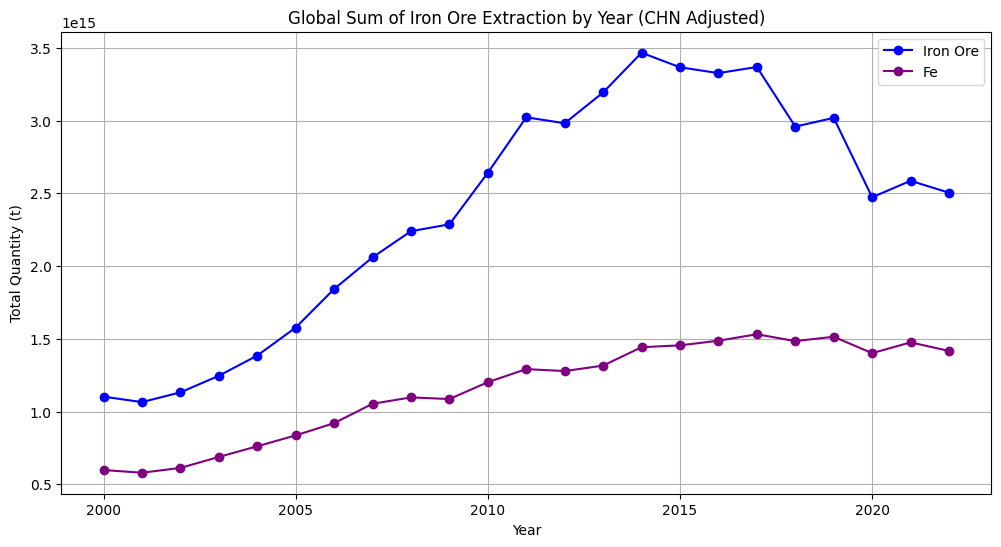

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming merged_df is already loaded and contains the correct columns
# Convert 'year' to datetime format if not already done
merged_df['year'] = pd.to_datetime(merged_df['year'], format='%Y')

# Group by 'year' and sum the quantities for each steel source, including 'steel_com'
global_sums = merged_df.groupby(merged_df['year'].dt.year).agg({
    'iron_ore': 'sum',
    'metal_content': 'sum',
}).reset_index()

# Replace 0 with np.nan to avoid plotting zeros
global_sums.replace(0, np.nan, inplace=True)

# Plotting the time series, NaNs will result in gaps
plt.figure(figsize=(12, 6))
plt.plot(global_sums['year'], global_sums['iron_ore'], label='Iron Ore', color='blue', marker='o')
plt.plot(global_sums['year'], global_sums['metal_content'], label='Fe', color='purple', marker='o')

# Adding titles and labels
plt.title('Global Sum of Iron Ore Extraction by Year (CHN Adjusted)')
plt.xlabel('Year')
plt.ylabel('Total Quantity (t)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


## Mapping Grades

In [82]:
# usgs mining points
usgs_point = gpd.read_file(raw_path + "iron_ore_mining.shp")
usgs_point

,DEP_ID,SITE_NAME,DEV_STAT,URL,CODE_LIST,lat,lon,CODE,geometry
0,10003697,Huya and Siwangpu,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE,32.20755,104.51410,MN FE,POINT (104.5141 32.20755)
1,10003707,Diaoshigou,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE PB,41.79809,96.39988,MN FE PB,POINT (96.39988 41.79809)
2,10003708,Dongping,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE,23.20768,106.60796,MN FE,POINT (106.60796 23.20768)
3,10003726,Jiaoling,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE,24.66593,116.23270,MN FE,POINT (116.2327 24.66593)
4,10003732,Lianzhou,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE AU AG,22.80773,111.50922,MN FE AU AG,POINT (111.50922 22.80773)
...,...,...,...,...,...,...,...,...,...
1061,None,Shiyela,None,None,None,0.00000,0.00000,None,POINT (14.84222 -22.93833)
1062,None,Safari Minero,None,None,None,0.00000,0.00000,None,POINT (-56.34438 -30.8655)
1063,None,Zapucay,None,None,None,0.00000,0.00000,None,POINT (-55.31711 -31.66367)
1064,None,Minas de Corrales,None,None,None,0.00000,0.00000,None,POINT (-55.51428 -31.58733)


In [83]:
from shapely.geometry import Point

# New coordinates to add
new_longitude = 0.8128893893573983
new_latitude = 9.316452005259045

# Create a new point geometry
new_point = Point(new_longitude, new_latitude)

# Create a new GeoDataFrame with the single point
new_row = gpd.GeoDataFrame(
    {'geometry': [new_point],
     "SITE_NAME": "Tchotougou iron ore mine"},  # Geometry column with the new point
    crs=usgs_point.crs          # Match the coordinate reference system (CRS) of the existing GeoDataFrame
)

# Append the new row to the existing GeoDataFrame
usgs_point = gpd.GeoDataFrame(
    pd.concat([usgs_point, new_row], ignore_index=True),
    crs=usgs_point.crs
)

# Display the updated GeoDataFrame
usgs_point

,DEP_ID,SITE_NAME,DEV_STAT,URL,CODE_LIST,lat,lon,CODE,geometry
0,10003697,Huya and Siwangpu,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE,32.20755,104.51410,MN FE,POINT (104.5141 32.20755)
1,10003707,Diaoshigou,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE PB,41.79809,96.39988,MN FE PB,POINT (96.39988 41.79809)
2,10003708,Dongping,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE,23.20768,106.60796,MN FE,POINT (106.60796 23.20768)
3,10003726,Jiaoling,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE,24.66593,116.23270,MN FE,POINT (116.2327 24.66593)
4,10003732,Lianzhou,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,MN FE AU AG,22.80773,111.50922,MN FE AU AG,POINT (111.50922 22.80773)
...,...,...,...,...,...,...,...,...,...
1062,None,Safari Minero,None,None,None,0.00000,0.00000,None,POINT (-56.34438 -30.8655)
1063,None,Zapucay,None,None,None,0.00000,0.00000,None,POINT (-55.31711 -31.66367)
1064,None,Minas de Corrales,None,None,None,0.00000,0.00000,None,POINT (-55.51428 -31.58733)
1065,None,Valentines,None,None,None,0.00000,0.00000,None,POINT (-55.12367 -33.24569)


In [84]:
source = (
    "USA: Mine Data Retrieval System from Mine Safety and Health Administration.\n"
    "Missing Countries: Manual Google Search from multiple sources.\n"
    "Rest of the World: Mineral Resources Data System (MRDS)."
)

ds_mine = ssm.point_2_grid(usgs_point, variable_name="iron_ore_mines", long_name="Iron Ore Mining Location",
                     units="mine per grid", source=source, verbose="yes")
ds_mine

Global stats before gridding : 1067.00
Global stats after gridding: 1067.00


<xarray.Dataset> Size: 2MB
Dimensions:         (lat: 180, lon: 360)
Coordinates:
  * lat             (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon             (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Data variables:
    iron_ore_mines  (lat, lon) float64 518kB nan nan nan nan ... nan nan nan nan
    grid_area       (lat, lon) float64 518kB ...
    land_frac       (lat, lon) float64 518kB ...
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

In [85]:
merged_df = pd.read_csv(output_path + "iron_ore_merged_grade_added_rolling_avg.csv")
merged_df

,Unnamed: 0,ISO3,year,iron_mfd,source_mdf,country_trans,iron_bgs,source_bgs,iron_usgs,source_usgs,Country,iron_wst,source_wst,iron_ore,source,grade,metal_content
0,30,ABW,2000,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534735,NaN
1,31,ABW,2001,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534735,NaN
2,32,ABW,2002,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534735,NaN
3,33,ABW,2003,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534735,NaN
4,34,ABW,2004,NaN,UNEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534735,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465,10861,ZWE,2017,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN,0.491290,NaN
4466,10862,ZWE,2018,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN,0.491290,NaN
4467,10863,ZWE,2019,NaN,UNEP,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN,0.491290,NaN
4468,10864,ZWE,2020,NaN,NaN,NaN,NaN,NaN,NaN,USGS,Zimbabwe,NaN,WST,NaN,NaN,0.491290,NaN


In [86]:
source = (
    "Disaggregated UNEP IRP Global Material Flows Database. (1970-2019).\n"
    "British Geological Survey. (1970-2022). World Mineral Statistics Dataset.\n"
    "USGS Iron Ore Statistics and Information (1998-2021). \n"
    "World Steel Association (1998-2021). \n"
    "Iron ore grade was estimated from USGS available countries by calculating the average grade for each country based on existing data, and missing grades were filled using the country-specific average. For countries without any available data, the global average grade was used as a fallback to ensure comprehensive coverage."
)

years = list(sorted((merged_df["year"].unique())))


dataset_list = []
for time in years:
    print(time)
    time_str = f"{time}-01-01"
    df_filtered = merged_df[merged_df["year"] == time].reset_index()
    ds = ssm.table_2_grid(surrogate_variable="iron_ore_mines", tabular_column="metal_content", surrogate_data=ds_mine,
                    tabular_data=df_filtered, variable_name="iron_metal", long_name="Metal Content From Iron Ore", units="g m-2 y-1", source=source,
                    time=time_str, normalize_by_area="yes", verbose="yes")
    dataset_list.append(ds)

merged_ds = xr.merge(dataset_list)
merged_ds

2000
Country Not Found: ['YUG', 'SUN']
Distributing iron_metal onto iron_ore_mines.
Global sum of jurisdictional dataset : 597747246677485.9
Global stats after gridding: 597747246677485.88
2001
Country Not Found: ['YUG', 'SCG', 'SUN']
Distributing iron_metal onto iron_ore_mines.
Global sum of jurisdictional dataset : 579295323748844.0
Global stats after gridding: 579295323748843.88
2002
Country Not Found: ['YUG', 'SCG', 'SUN']
Distributing iron_metal onto iron_ore_mines.
Global sum of jurisdictional dataset : 612364412301714.2
Global stats after gridding: 612364412301714.38
2003
Country Not Found: ['YUG', 'SCG', 'SUN']
Distributing iron_metal onto iron_ore_mines.
Global sum of jurisdictional dataset : 687903191971550.8
Global stats after gridding: 687903191971550.75
2004
Country Not Found: ['YUG', 'SCG', 'SUN']
Distributing iron_metal onto iron_ore_mines.
Global sum of jurisdictional dataset : 761226966511379.9
Global stats after gridding: 761226966511380.00
2005
Country Not Found: ['Y

<xarray.Dataset> Size: 13MB
Dimensions:     (lat: 180, lon: 360, time: 23)
Coordinates:
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon         (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time        (time) datetime64[ns] 184B 2000-01-01 2001-01-01 ... 2022-01-01
Data variables:
    iron_metal  (time, lat, lon) float64 12MB nan nan nan nan ... nan nan nan
    grid_area   (lat, lon) float64 518kB 1.089e+08 1.089e+08 ... 1.089e+08
    land_frac   (lat, lon) float64 518kB 0.005732 0.005732 0.005732 ... 0.0 0.0
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

In [87]:
merged_ds.to_netcdf(output_path + "L.iron_ore_metal.2000-2022.a.nc")

In [90]:
ds_iron = xr.open_dataset(output_path + "L.iron_ore.2000-2022.a.nc")
ds_iron = ds_iron.drop_vars(["grid_area", "land_frac"])
ds_iron

<xarray.Dataset> Size: 12MB
Dimensions:         (lon: 360, lat: 180, time: 23)
Coordinates:
  * lon             (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * lat             (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time            (time) datetime64[ns] 184B 2000-01-01 ... 2022-01-01
Data variables:
    iron_ore_mines  (lat, lon) float64 518kB ...
    iron_ore        (time, lat, lon) float64 12MB ...
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

In [91]:
ds_metal = xr.open_dataset(output_path + "L.iron_ore_metal.2000-2022.a.nc")
ds_metal

<xarray.Dataset> Size: 13MB
Dimensions:     (lon: 360, lat: 180, time: 23)
Coordinates:
  * lon         (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time        (time) datetime64[ns] 184B 2000-01-01 2001-01-01 ... 2022-01-01
Data variables:
    grid_area   (lat, lon) float64 518kB ...
    land_frac   (lat, lon) float64 518kB ...
    iron_metal  (time, lat, lon) float64 12MB ...
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

In [92]:
ds_combined = xr.merge([ds_iron, ds_metal])
ds_combined

<xarray.Dataset> Size: 25MB
Dimensions:         (lon: 360, lat: 180, time: 23)
Coordinates:
  * lon             (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * lat             (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time            (time) datetime64[ns] 184B 2000-01-01 ... 2022-01-01
Data variables:
    iron_ore_mines  (lat, lon) float64 518kB ...
    iron_ore        (time, lat, lon) float64 12MB ...
    grid_area       (lat, lon) float64 518kB ...
    land_frac       (lat, lon) float64 518kB ...
    iron_metal      (time, lat, lon) float64 12MB ...
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

In [93]:
# Sort variables except for the ones that should be at the end
ds = ds_combined
sorted_variables = sorted([var for var in ds.data_vars if var not in ["land_frac", "land_area", "grid_area"]])

# Add the specified variables at the end in the desired order
for var in ["land_frac", "land_area", "grid_area"]:
    if var in ds.data_vars:
        sorted_variables.append(var)

# Create a new dataset with sorted variables and the specified variables at the end
ds_sorted = ds[sorted_variables]
ds_sorted

<xarray.Dataset> Size: 25MB
Dimensions:         (time: 23, lat: 180, lon: 360)
Coordinates:
  * lon             (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * lat             (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time            (time) datetime64[ns] 184B 2000-01-01 ... 2022-01-01
Data variables:
    iron_metal      (time, lat, lon) float64 12MB ...
    iron_ore        (time, lat, lon) float64 12MB ...
    iron_ore_mines  (lat, lon) float64 518kB ...
    land_frac       (lat, lon) float64 518kB ...
    grid_area       (lat, lon) float64 518kB ...
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

In [96]:
ds_sorted.to_netcdf(netcdf_path + "L.iron_ore.2000-2022.a.nc")

In [98]:
ds = xr.open_dataset(netcdf_path + "L.iron_ore.2000-2022.a.nc")
ds["grade"] = (ds["iron_metal"] * 100)/ ds["iron_ore"]
ds

<xarray.Dataset> Size: 37MB
Dimensions:         (lon: 360, lat: 180, time: 23)
Coordinates:
  * lon             (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * lat             (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time            (time) datetime64[ns] 184B 2000-01-01 ... 2022-01-01
Data variables:
    iron_ore_mines  (lat, lon) float64 518kB ...
    land_frac       (lat, lon) float64 518kB ...
    grid_area       (lat, lon) float64 518kB ...
    iron_metal      (time, lat, lon) float64 12MB nan nan nan ... nan nan nan
    iron_ore        (time, lat, lon) float64 12MB ...
    grade           (time, lat, lon) float64 12MB nan nan nan ... nan nan nan
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

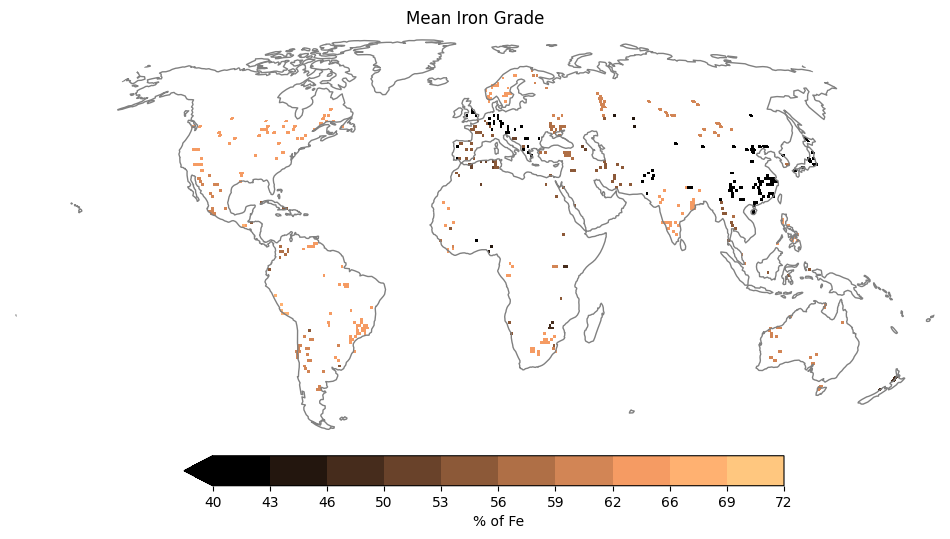

<GeoAxes: title={'center': 'Mean Iron Grade'}>

In [101]:
ssm.plot_map(ds.mean(dim="time"), "grade", vmin=40, vmax=72, levels=10, extend_min=True, color="copper", title="Mean Iron Grade", label="% of Fe", out_bound=False, remove_ata=True, output_dir=plot_path, filename="mean_iron_grade")